In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk

In [51]:
params = pd.read_csv("../data/am_data.csv")
params.head()

,ID,StudySample,LaserPowerHatch,LaserSpeedHatch,HatchSpacing,LaserPowerContour,Porosity,LayerHeight,EnergyDensityCalculated,Machine,Powder,MicroCTScan,HatchOffsetFromCountour
0,1,Plessis_1-1,280.0,1200.0,0.14,150.0,0.013,0.03,55.555556,EOS M290,EOS-supplied Ti6Al4V ELI,NaN,0.015
1,2,Plessis_1-2,252.0,1200.0,0.14,135.0,0.008,0.03,50.000000,EOS M290,EOS-supplied Ti6Al4V ELI,NaN,0.015
2,3,Plessis_1-3,224.0,1200.0,0.14,120.0,0.007,0.03,44.444444,EOS M290,EOS-supplied Ti6Al4V ELI,NaN,0.015
3,4,Plessis_1-4,197.0,1200.0,0.14,105.0,0.045,0.03,39.087302,EOS M290,EOS-supplied Ti6Al4V ELI,NaN,0.015
4,5,Plessis_1-5,308.0,1200.0,0.14,165.0,0.017,0.03,61.111111,EOS M290,EOS-supplied Ti6Al4V ELI,NaN,0.015


In [52]:
machine_title = params.Machine[0]
alloy_title = params.Powder[0]

In [53]:
try:
    params = params.drop(["ID","StudySample","HatchOffsetFromCountour", "MicroCTScan", "LayerHeight", "Machine", "Powder"], axis=1)
    print("dropped columns")
except:
    print("already dropped columns")
params.columns = ["LaserPowerHatch","LaserSpeedHatch","HatchSpacing","LaserPowerContour","EnergyDensityCalculated","Porosity"]
params.head()

dropped columns


,LaserPowerHatch,LaserSpeedHatch,HatchSpacing,LaserPowerContour,EnergyDensityCalculated,Porosity
0,280.0,1200.0,0.14,150.0,0.013,55.555556
1,252.0,1200.0,0.14,135.0,0.008,50.000000
2,224.0,1200.0,0.14,120.0,0.007,44.444444
3,197.0,1200.0,0.14,105.0,0.045,39.087302
4,308.0,1200.0,0.14,165.0,0.017,61.111111


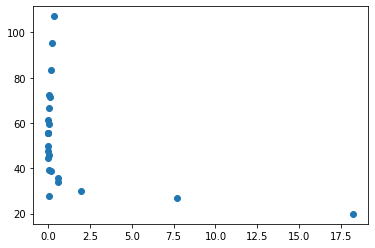

In [54]:
plt.scatter(params.EnergyDensityCalculated, params.Porosity)
plt.show()

With this little data, probably not even worth trying to apply in ML to derive insight. Analytical methods would be far more effective. The Plessis paper finds the correlations between certain parameters and the production of keyhole pores/other pores, but still does not provide any standard to apply parameters to acheive a desired tensile strength or porosity.
Further steps might drop rows with outlier energy density calculations and split the data into training and testing, and trying to work through some models, however at this point need to gather much more data first and allocate my time towards data aggregation.